In [64]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# read and look at data
edu = pd.read_csv('xAPI-Edu-Data.csv')
edu

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [65]:
# make train dataset
edu_train = edu.copy()

In [66]:
# clean data 

# get two grades
edu_train = edu_train.loc[edu['GradeID'].isin(['G-07','G-08'])]
edu_train

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [67]:
# drop stageID, sectionID, semester, relation, parentansweringsurvey, parentschoolsatisfaction
edu_train = edu_train.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)
edu_train

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
6,M,G-07,Math,35,12,0,17,Above-7,L
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
...,...,...,...,...,...,...,...,...,...
475,F,G-08,Chemistry,5,4,5,8,Above-7,L
476,F,G-08,Geology,50,77,14,28,Under-7,M
477,F,G-08,Geology,55,74,25,29,Under-7,M
478,F,G-08,History,30,17,14,57,Above-7,L


In [68]:
# dropna
edu_train = edu_train.dropna()
edu_train

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
6,M,G-07,Math,35,12,0,17,Above-7,L
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
...,...,...,...,...,...,...,...,...,...
475,F,G-08,Chemistry,5,4,5,8,Above-7,L
476,F,G-08,Geology,50,77,14,28,Under-7,M
477,F,G-08,Geology,55,74,25,29,Under-7,M
478,F,G-08,History,30,17,14,57,Above-7,L


In [69]:
edu_train['Topic'].value_counts()

Biology      30
Arabic       28
Spanish      24
Chemistry    24
Geology      24
IT           21
Science      19
Quran        17
Math         16
History      12
English       2
Name: Topic, dtype: int64

In [71]:
# drop English topic because there are only two observations 
edu_train = edu_train[edu_train.Topic != 'English']
edu_train

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
6,M,G-07,Math,35,12,0,17,Above-7,L
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
...,...,...,...,...,...,...,...,...,...
475,F,G-08,Chemistry,5,4,5,8,Above-7,L
476,F,G-08,Geology,50,77,14,28,Under-7,M
477,F,G-08,Geology,55,74,25,29,Under-7,M
478,F,G-08,History,30,17,14,57,Above-7,L


In [72]:
edu_train['Class'].value_counts()

M    101
H     62
L     52
Name: Class, dtype: int64

In [73]:
# drop low
edu_train = edu_train[edu_train.Class != 'L']
edu_train

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
11,M,G-07,Math,19,6,19,12,Under-7,M
...,...,...,...,...,...,...,...,...,...
471,M,G-08,History,78,82,78,53,Under-7,M
472,M,G-08,Geology,80,87,74,68,Under-7,M
473,M,G-08,Geology,85,88,79,70,Under-7,M
476,F,G-08,Geology,50,77,14,28,Under-7,M


In [74]:
edu_train.replace(to_replace = {'M': 0, 'H': 1}, inplace = True)
edu_train

/var/folders/wy/h6ms0d9x5mb69xv5ynq_lm5m0000gn/T/ipykernel_2793/62600015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_train.replace(to_replace = {'M': 0, 'H': 1}, inplace = True)


,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
7,0,G-07,Math,50,10,15,22,Under-7,0
8,F,G-07,Math,12,21,16,50,Under-7,0
9,F,G-07,IT,70,80,25,70,Under-7,0
10,0,G-07,Math,50,88,30,80,Under-7,1
11,0,G-07,Math,19,6,19,12,Under-7,0
...,...,...,...,...,...,...,...,...,...
471,0,G-08,History,78,82,78,53,Under-7,0
472,0,G-08,Geology,80,87,74,68,Under-7,0
473,0,G-08,Geology,85,88,79,70,Under-7,0
476,F,G-08,Geology,50,77,14,28,Under-7,0


In [75]:
# developing model
model1 = smf.logit(formula = 'Class~gender+raisedhands+VisITedResources+AnnouncementsView+Discussion+StudentAbsenceDays', data = edu_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.442542
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  163
Model:                          Logit   Df Residuals:                      156
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.3338
Time:                        13:19:22   Log-Likelihood:                -72.134
converged:                       True   LL-Null:                       -108.27
Covariance Type:            nonrobust   LLR p-value:                 1.395e-13
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -10.1343      1.821     -5.566      0.000     -13.703      -6.565
gender[T.F]                       1.3045      0.476      2.740      0.006       0.371       2.238
StudentAbsenceDays[T.Under-7]     2.2674      0.796      2.849      0.004       0.707       3.827
raisedhands                       0.0250      0.012      2.158      0.031       0.002       0.048
VisITedResources                  0.0550      0.017      3.148      0.002       0.021       0.089
AnnouncementsView                 0.0014      0.010      0.134      0.893      -0.019       0.021
Discussion                        0.0204      0.008      2.439      0.015       0.004       0.037
=================================================================================================
"""

In [76]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.3):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))

Classification accuracy = 73.6%
Precision = 60.4%
TPR or Recall = 88.7%
FNR = 11.3%
FPR = 35.6%


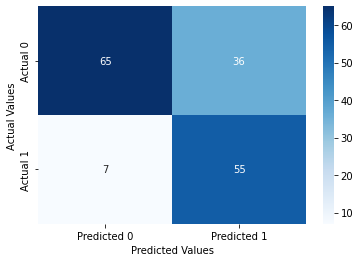

In [77]:
confusion_matrix_data(edu_train, edu_train.Class, model1)

In [81]:
# make test dataset

edu_test = edu.copy()

In [82]:

edu_test = edu_test.loc[edu_test['GradeID'].isin(['G-06'])]
edu_test = edu_test.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)
edu_test = edu_test[edu_test.Class != 'L']
edu_test.replace(to_replace = {'M': 0, 'H': 1}, inplace = True)
edu_test

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
15,F,G-06,IT,30,40,22,66,Under-7,0
245,F,G-06,IT,50,40,52,66,Under-7,0
246,F,G-06,Science,80,94,62,77,Under-7,1
247,F,G-06,Math,87,48,82,96,Above-7,0
264,F,G-06,English,70,64,42,32,Under-7,0
265,F,G-06,English,79,84,82,37,Under-7,1
266,0,G-06,English,19,80,12,17,Above-7,0
267,0,G-06,English,11,70,32,29,Above-7,0
268,0,G-06,English,10,8,10,10,Above-7,0
269,0,G-06,English,18,28,40,20,Above-7,0


In [84]:
from pathlib import Path  
filepath = Path('/Users/phillipmeng/Desktop/Stat 303-2/edu_test.csv')  
filepath.parent.mkdir(parents = True, exist_ok = True)  
edu_test.to_csv(filepath)  

In [85]:
# predict
pred_class = model1.predict(edu_test)
pred_class

15     0.096737
245    0.155446
246    0.906027
247    0.125585
264    0.358812
265    0.711294
266    0.007423
267    0.004618
268    0.000098
269    0.000461
270    0.729591
271    0.725637
272    0.004811
273    0.003411
274    0.865975
275    0.606794
276    0.012744
277    0.037264
278    0.028499
279    0.039297
280    0.217790
281    0.131981
282    0.937979
283    0.925367
284    0.001899
285    0.002195
286    0.729586
287    0.841498
288    0.322416
289    0.413903
dtype: float64